# Travelling Salesman Algorithm

I chose to create an algorithm of this type because afer some research into colour sorting I found this was a good process to use becuase it doesn't sort the colours into groups but makes an almost seamless transition into the next colour. This would benefit the overall project as it states that this would be used to sort coloured photos and this method would acheive that very well.

This method of sorting the colours into a strip acheives its goal by starting off with the first colour in the list. The algorithm then compares the distances between the currently chosen colour and the other available colours to find the lowest distance (ie the next colsest colour). Once the closest colour has been determined that colour is not set to be the new current colour and the previous colour is sent to the "removedColours" array which holds all the colours that have already been used.

### Read the File

Method reads the text file that was parsed.

In [1]:
import numpy as np      # Numerical library, used keeing the list of colours and computing the Euclidean distance

# Read in the color data file 
# Input: string with file name
# Oputput: the number of colours (integer), and a list numpy arrays with all the colours
def read_data(fname):
    cols = np.loadtxt(fname, skiprows = 4) # The first 4 lines have text information, and are ignored     
    ncols = len(cols)     # Total number of colours and list of colours
    return ncols,cols

### Plot Colours in Strip

Method plots the colours from the provided array in a strip. The colours are ordered through the order list that is parsed.

In [2]:
import matplotlib.pyplot as plt

# Dsiplay the colors as a strip of color bars
# Input: list of colors, order of colors, and height/ratio

def plot_colours(col_list, col_order, ratio = 10): 
    assert len(col_list) == len(col_order)
    img = np.zeros((ratio, len(col_list), 3))
    for i in range(0, len(col_list)):
        img[:, i, :] = col_list[col_order[i]]
    fig, axes = plt.subplots(1, figsize=(10,6)) # figsize=(width,height) handles window dimensions
    axes.imshow(img, interpolation='nearest')
    axes.axis('off')
    plt.show()

### Evaluation Functions

The euclid method compares two colours together to find the distance between them. The evaluate method measures the quality of an order list that its been provided with. The evaluation makes use of the euclid method.

In [3]:
# This is an auxiliary function. It calculate the Euclidean distance between two individual colours
# Input: v and u as to be numpy arrays, vectors of real numbers with the RGB coordinates.

def euclid(v, u):
    return np.linalg.norm(v - u)

# Evaluation function.  Measures the quality of a given solution (ordering of colours) 
# The function computes the sum of the distances between all consecutive colours in the ordering
# Input: cols: list of colours 
#        ordc: ordering of colours
# Output: real number with the sumf of pair-wise differences in the colour ordering

def evaluate(cols, ordc):     
    adjacentColPairs = [[cols[ordc[i]],cols[ordc[i-1]]] for i in range(1,len(ordc))]
    return sum([euclid(i[1], i[0]) for i in adjacentColPairs])

### The Algorithm

The find closest colour method serves the purpose of determining which of the colours in the available colours list is the closest. 
The available colours array contains a depleting list of colours.
The removed colours array is an increasing list of colours that have been blacklisted (are to no longer be used).

In [4]:
def findClosestColour(currentColourIndex, avColours, colourRGB, removedColours):# method determines the next closest colour
    currentDistance = 10# current distance variable is used to calc the best distance. It's set to 10 by default because the calculated distance will never be great or equal than 10
    removed = 'false'# removed variable is used to break the loop when a condition is met
    closestColIndex = 0# the index of the colour thats closest to the current colour
    
    for c in range(len(avColours)):# iterate for the number of colours that exist in the available colours
        
        if currentColourIndex == c:# if the current colour is pointing to itself
            continue# skip to next loop iteration
        
        for i in range(len(removedColours)):# loop checks if the colour being pointed to from available colours exists in the removed colours
            temp1 = avColours[c]
            temp2 = removedColours[i]
            if np.array_equal(temp1,temp2):# if the available colour being pointed to is in the removed list
                removed = 'true'
                
        if removed == 'true':# if the removed variable is true then skip the loop
            continue
        
        distance = euclid(colours[currentColourIndex],avColours[c])# variable is set to the distance between the colours
        
        if distance < currentDistance:# if the distance is less than the best distance, then update the best distance
            currentDistance = distance
            closestColIndex = c
            
    colourRGB = avColours[closestColIndex]# set the array to hold the data values for the colour that closest
    
    removedColours.append(avColours[closestColIndex])# add the colour to the removed colours array
    avColours = np.delete(avColours, closestColIndex, 0)# remove the colour from the array
                     
    return closestColIndex, avColours, colourRGB# return the index of the closest colour, the array of available colours, and the closest colour in its RGB values

The find colour index method servers the purpose of obtaining the index value of a colour from within an array of colours. The method requires the parsing of a colour and a list of colours. The method loops through the list searching for a match with the colour that was also sent, once a match is found then the index value is returned.

In [5]:
def findColourIndex(colourRGB,arr):# this method compares a colour against the colour list and returns the index from the original colours
    cList = list(range(len(arr)))# get the list of default indexes
    
    for i in range(len(cList)):# loop checks if the colour being pointed to from available colours exists in the removed colours
        if np.array_equal(colourRGB,colours[i]):# if the colour being checks matches with a colour in the default list
            return i# return the index value for the order list

The main method acts like a main method normally would in other programming languages. It's the method which calls the other methods and calculates the order of colours.

In [6]:
def main():# main method that is run with each individual file
    order = []# array that holds the order of colours in the final solution
    availableColours = colours# a list of the colours that exist
    removedColours = []# list of colours that have been removed
    closestColourIndex = 0# index of the colour that is being pointed to
    currentColourIndex = 0# the index of the colour that is currently pointing to others
    currentColourRGB = []# the rgb values for the current colour being used
    
    for i in range(ncolours):# for the number of colours that exist
        # get the following parameters back from the ran method
        closestColourIndex, availableColours, currentColourRGB = findClosestColour(currentColourIndex, availableColours, currentColourRGB, removedColours)
        currentColourIndex = findColourIndex(currentColourRGB,colours)# find the index from the default colour list that correlates to the closest colour
        #print('colour from default list being added to list is',currentColourIndex)
        order.append(currentColourIndex)# add the found index to the order list

    #print('order of colours:',order)
    print('Evaluation:',evaluate(colours,order))
    plot_colours(colours,order)

### Iterate Through Seperate Files

 This section of code loads a file for the program one at a time. It initialises the colours array with the colours from the text file by calling the read_data method. Prints to the screen have been included to ensure the user knows that it may take a bit of time to calculate the colour strip.

File 1: please allow time for loading


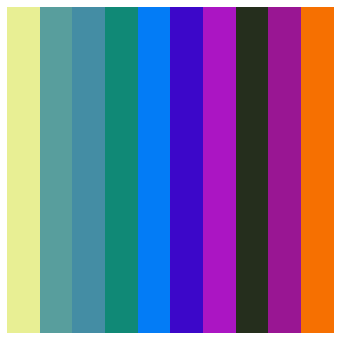

File 2: please allow time for loading


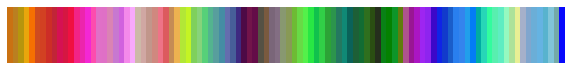

File 3: please allow time for loading


In [7]:
for i in range(3):#range set to 3 by default for the 3 files
    if i == 0:
        print('File 1: please allow time for loading')
        ncolours, colours = read_data("col10.txt")# read the first file
        main()# run the main method
    elif i == 1:
        print('File 2: please allow time for loading')
        ncolours, colours = read_data("col100.txt")# read the second file
        main()# run the main method
    else:
        print('File 3: please allow time for loading')
        ncolours, colours = read_data("col500.txt")# read the third file
        main()# run the main method

In creating the ideal solution to this algorithm I had implemented an available colours array and a removed colours array which held the RGB vlaues for those colours. The reason for this is because keeping tack of constantly changing indexes was becoming difficult so by saving the colour itself I could thencompare it to the full default list of colours and then obtain the index fo rhtat colour that way. This method of achieveing the colour index, though inefficient, is very effective.